In [1]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from math import factorial 

## Критерій хі-квадрат про розподіл: відомий розподіл, відомі параметри. 

### Задача 1. 

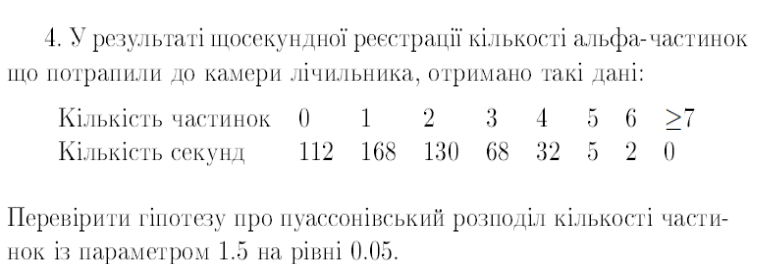



### Розв'язок. 

Критерій хі-квадрат: 
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

Приклад: 

https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/

Абсолютні частоти, отримані з експерименту: 

In [2]:
nu_obs = [112, 168, 130, 68, 32, 7]
k = len(nu_obs)
n = sum(nu_obs)
print(k,n)

6 517


Задамо параметри: 

In [3]:
lam = 1.5
alpha = 0.05

Обчислимо тепер теоретичні абсолютні частоти: 
$$ 
n \nu _i = n p_i:= n\frac{\lambda^i}{i!}  e^{-\lambda }. 
$$

In [4]:
nu_exp =  [ n* lam**(i) * np.exp(- lam) /(factorial(i)) for i in range(k)]
print(nu_exp)

[115.35829279673821, 173.0374391951073, 129.7780793963305, 64.88903969816525, 24.33338988681197, 7.30001696604359]


Обчислимо 
$$
\chi_{emp}^2 := \sum_{i=1}^k \frac{(O-E)^2}{E}. 
$$

In [5]:
nu_obs = np.array(nu_obs)
nu_exp = np.array(nu_exp)

In [6]:
aux = [(nu_obs - nu_exp )**2 /nu_exp]
print(aux)

[array([9.77661010e-02, 1.46649152e-01, 3.79484383e-04, 1.49148054e-01,
       2.41548386e+00, 1.23301330e-02])]


In [7]:
chi2_emp = np.sum(aux)
print(chi2_emp)

2.8217567879676517


Якщо об'єднати в 1 лише 2 останні групи: 

In [8]:
nu_obs1 = [112, 168, 130, 68, 32, 5, 2]
k1 = len(nu_obs1)
n1 = sum(nu_obs1)
nu_exp1 =  [ n* lam**(i) * np.exp(- lam) /(factorial(i)) for i in range(k1)]
nu_obs1 = np.array(nu_obs1)
nu_exp1 = np.array(nu_exp1)
aux1 = [(nu_obs1 - nu_exp1 )**2 /nu_exp1]
chi2_emp1 = np.sum(aux1)
print(chi2_emp1)

3.550873165489682


Обчислимо квантіль хі-квадрат розподілу рівня 0.95 у випадку, коли у нас 6 і 7 груп відповідно: 

In [9]:
chi2.ppf(1-alpha, k-1, loc=0, scale=1)

11.070497693516351

In [10]:
chi2.ppf(1-alpha, k1-1, loc=0, scale=1)

12.591587243743977

Отже, в обох випадках приймаємо нульову гіпотезу. 

## Критерій хі-квадрат незалежності та критерій хі-квадрат однорідності

**Задача 1.**  Співробітник банку Вільгельм Тілль  перевіряє співвідношення між  витратами пана Джованні Мафіозі  та його доходами від невідомого Х. Він має наступні дані за 6 місяців (у тис. франків):  
	
	Витрати: 1.9, 3.8, 5.1, 4.5, 5.4, 5.5. 
	
	Доходи:  4.4, 5.2, 5.3, 5.1, 4.9, 4.7. 
	
  Застосувати критерій  хі-квадрат незалежності     для перевірки гіпотези про те, що доходи пана  Джованні Мафіозі  та його витрати є незалежними. Вважати, що $\alpha=0.05$. 

**Розв'язок.** Задаємо спочатку вектори та визначимо тимчасові змінні $n$, $X$ та $O$. 

In [11]:
import scipy.stats as ss
import numpy as np
from math import sqrt

In [12]:
expences = np.array([1.9,3.8,5.1,4.5,5.4,5.5])
incomes = np.array([4.4,5.2,5.3,5.1,4.9,4.7])
X = np.vstack([expences, incomes])
O = np.concatenate([expences, incomes])
print(X, "\n")
print(O)

[[1.9 3.8 5.1 4.5 5.4 5.5]
 [4.4 5.2 5.3 5.1 4.9 4.7]] 

[1.9 3.8 5.1 4.5 5.4 5.5 4.4 5.2 5.3 5.1 4.9 4.7]


Нагадування про vstack  та concatenate: 

https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

Обчислимо тепер суми в рядочку $\nu_{i \cdot}^p$, $i=1,2$. 

In [13]:
Sum_per_row = np.sum(X, axis = 1)  

Sum_per_row 

array([26.2, 29.6])

і суми в стовбчику   $\nu_{\cdot i }^p$, $i=1,\dots ,6$. 

In [14]:
Sum_per_column = np.sum(X, axis = 0)

Sum_per_column

array([ 6.3,  9. , 10.4,  9.6, 10.3, 10.2])

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

Також підрахуємо загальну кількість елементів $S$:

In [15]:
n = len(expences)

Тепер ми перемножимо суми по стовбчикам і суми по рядкам, та розташуємо результат в такому ж порядку, як і елементи в $O$ (щоб потім взяти різницю): 
$$
(\nu_{1\cdot}\nu_{\cdot i}, \nu_{2\cdot}\nu_{\cdot i})/n.
$$

In [16]:
E = np.hstack([Sum_per_column * Sum_per_row[0]/n ,  Sum_per_column * Sum_per_row[1]/n])

E

array([27.51      , 39.3       , 45.41333333, 41.92      , 44.97666667,
       44.54      , 31.08      , 44.4       , 51.30666667, 47.36      ,
       50.81333333, 50.32      ])

https://numpy.org/doc/stable/reference/generated/numpy.hstack.html

Нарешті, обчислимо $\sum (O-E)^2/ E$. 

In [17]:
O_minus_E_squared = (O - E)**2

chi_sq_emp = np.sum(np.divide(O_minus_E_squared, E))

print(chi_sq_emp)

413.46206997300715


Задамо тепер $\alpha =0.05$  і перевіримо гіпотезу. 

In [18]:
alpha = 0.05
chi_sq_theor = ss.chi2.ppf(1-alpha, df = 5)
print(chi_sq_theor)
print(chi_sq_emp>chi_sq_theor )

11.070497693516351
True


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html

**Задача 2.** Пан Джованні Мафіозі відкрив  новий рахунок. Стало відомо, що протягом  дня  відбулася велика кількість  покупок, причому були сплачені чеки на наступні суми (тис. франків, суми округлені):  більше 20 тис:  0 раз, 20  тис:   1 раз, 15  тис:  3 рази,  12 тис : 6 разів, 10 тис. 7 разів,  5 тис: 10 разів: 6 разів.    Співробітник банку пан Дупланчич   зробив припущення, що сплачені суми є
	пуассонівськими випадковими величинами  з деяким параметром.   Чи можна стверджувати, що пан  Дупланчич  зробив вірне припущення? 
    
**Розв'язок.**  Введемо дані, та підрахуємо кількість подій. Далі, ми обчислимо оцінку  $\lambda$ (попередньо потрібно вивести оцінку максимальної вирогідності $\hat{\lambda}_n$ для
$\lambda$. 

In [19]:
xj = np.array([20, 15, 12, 10, 5])   # values
nj = np.array([1, 3, 6, 7, 2])      # numer of events

n = np.sum(nj)

lambda_estim = np.sum(xj * nj)/n

Далі ми обчислюємо емпіричну статистику хі-квадрат за формулою $\sum (O-E)^2/ E$.  

In [20]:
O = xj 
E = n * ss.poisson.cdf(nj, mu = lambda_estim)

O_minus_E_squared = (O - E)**2 

chi_sq_emp = np.sum(O_minus_E_squared/E)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.cdf.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html

Тепер визначаємо  $\alpha$ і перевіряємо гіпотезу  $H_0$: ''розподіл витрат є пуассонівським'' проти альнернативи $H_1$: ''розподіл витрат не є пуассонівським''. 

In [21]:
alpha = 0.05
chi_sq_theor = ss.chi2.ppf(1-alpha, df = len(xj)-2)

if (chi_sq_emp > chi_sq_theor):
    print("Reject")
else:
    print("Accept")

Reject


Отже, відхиляємо $H_0$. 